In [1]:
import numpy as np
import random as rand
import matplotlib.pyplot as plt

In [2]:
numberOfIterations = 2000
numberOfPlays = 1000    # Number of epoches (N)
numberOfArms = 10      # Number of arms of bandit (K)

EpsilonList = np.array((0 , 0.01 , 0.1)) # a list of different epsilons

result = np.zeros((len(EpsilonList), numberOfPlays))  # a list to hold results 1*1000
result_2 = np.zeros((len(EpsilonList), numberOfPlays)) # 1*1000
result_accuray = np.zeros((len(EpsilonList), numberOfPlays)) #1*1000


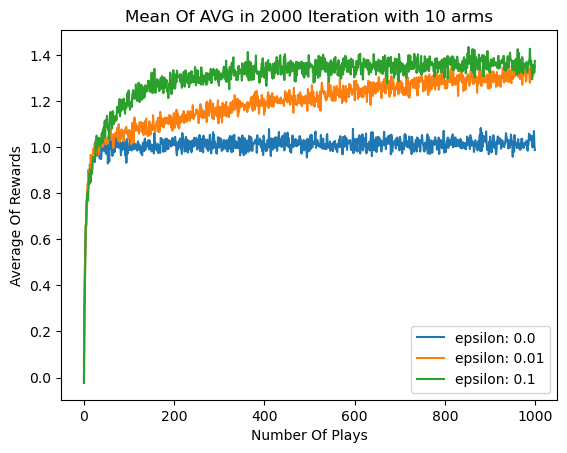

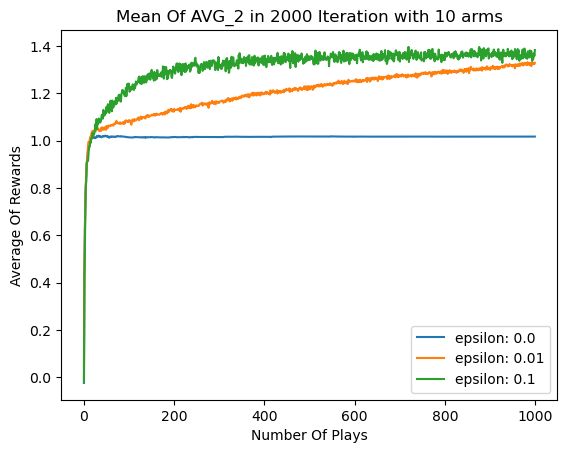

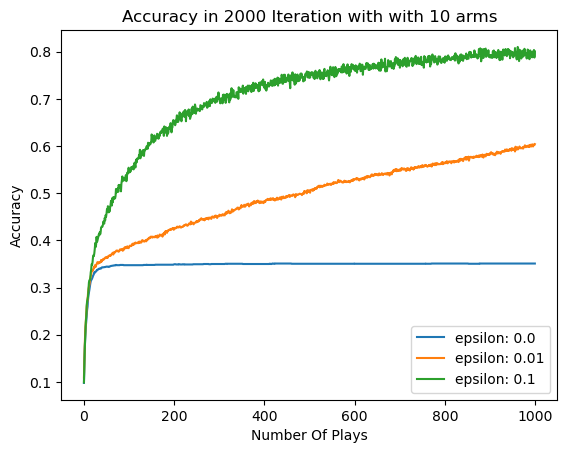

In [3]:
for e in range(len(EpsilonList)):
    epsilon = EpsilonList[e]
    AVG = np.zeros((numberOfIterations , numberOfPlays))
    AVG_2 = np.zeros((numberOfIterations , numberOfPlays))
    accuray = np.zeros((numberOfIterations , numberOfPlays))
    
    for j in range(numberOfIterations): # for example 2000
        armsRewards = np.random.normal(loc=0 , scale = 1, size=(numberOfPlays,numberOfArms)) # 1000*10
        QStar = np.random.normal(loc=0 , scale =1 , size = (1 , numberOfArms)) # 1*10
        
        # add QStar to each columns
        for i in range(numberOfArms):
            armsRewards[:,i] = armsRewards[:,i] + QStar[0,i]
        
        # Calculate expected arm 
        expectedArm = np.argmax(np.mean(armsRewards,axis=0))
        #a list that hold Qk
        meanRewardsOfArms = np.zeros((1, numberOfArms)) 
        
        rewards = np.zeros((1, numberOfPlays))
        
        # number of actions that an agent acted on an arm : k
        actCountPerArm = np.zeros((1, numberOfArms)) 
        
        for i in range(numberOfPlays): # for exaple 1000 plays
            rouletteWheel = np.random.uniform(low = 0 , high = 1 )
            
            # greedy and non greedy selection
            if(rouletteWheel >= epsilon):
                selectedArm = np.argmax(meanRewardsOfArms[0])
            else: 
                selectedArm = np.random.randint(low =0 ,high= numberOfArms)
            
            k = actCountPerArm[0,selectedArm]
            meanRewardsOfArms[0,selectedArm] = (meanRewardsOfArms[0,selectedArm] + 
                                                1/(k+1)*(armsRewards[int(k),selectedArm] - 
                                                         meanRewardsOfArms[0,selectedArm]) )
            
            actCountPerArm[0,selectedArm] +=1
            
            AVG[j,i]= armsRewards[int(k),selectedArm]
            AVG_2[j,i]= meanRewardsOfArms[0,selectedArm] #????
            
            if expectedArm==selectedArm:
                accuray[j,i] = 1
            else:
                accuray[j,i] = 0 
    
    result[e] = np.mean(AVG , axis=0) # result for actual result
    result_2[e] = np.mean(AVG_2 , axis=0) # result for average value
    result_accuray[e]=np.mean(accuray , axis=0)

    
    
for e in range(len(EpsilonList)):
    plt.plot(result[e]  , label = f'epsilon: {EpsilonList[e]}')
#     plt.text(numberOfPlays , result[e][numberOfPlays-1] , 'e={0}'.format(EpsilonList[e]))
    
plt.xlabel('Number Of Plays')
plt.ylabel('Average Of Rewards')
plt.title('Mean Of AVG in {0} Iteration with {1} arms'.format(numberOfIterations, numberOfArms))
plt.legend(loc= 'lower right')
plt.show()

for e in range(len(EpsilonList)):
    plt.plot( result_2[e] , label = f'epsilon: {EpsilonList[e]}' )
    
plt.xlabel('Number Of Plays', )
plt.ylabel('Average Of Rewards')
plt.title('Mean Of AVG_2 in {0} Iteration with {1} arms'.format(numberOfIterations, numberOfArms))
plt.legend(loc= 'lower right')
plt.show()

for e in range(len(EpsilonList)):
    plt.plot(result_accuray[e], label = f'epsilon: {EpsilonList[e]}')
    
plt.xlabel('Number Of Plays')
plt.ylabel('Accuracy')
plt.title('Accuracy in {0} Iteration with with {1} arms'.format(numberOfIterations, numberOfArms))
plt.legend(loc= 'lower right')
plt.show()

